# アニメーションの作成

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as anm  # アニメーションのライブラリ
import matplotlib
matplotlib.rcParams['savefig.facecolor'] = 'white'
from IPython.display import HTML
import numpy as np

データ作成

In [7]:
x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(x)

matplotlib.animationにはArtistAnimationとFuncAnimationという2大流派がある．  
ArtistAnimationにはシンプルだがメモリ使用量が多い，FuncAnimationは複雑だけど高速という特徴がある（らしい）．  
筆者は後者しか使ったことがないので，ここではFuncAnimationを説明する．

## FuncAnimation
### 流れ
1. figとaxを作成
2. axに1フレームのplotを行うアップデート関数を作成
3. Funcanimationにfigとアップデート関数を渡す
  
まずはfig,axを作成

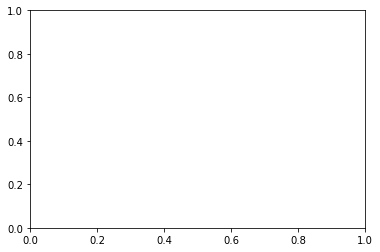

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

次にアップデート関数を作成．この関数が毎フレームに呼ばれ1枚のプロットを作る．  

In [15]:
def update(i):
    """FuncAnimationで使うアップデート関数"""
    ax.cla()  # 前のプロットを消す
    ax.plot(x[i], y[i], label="moving point", marker="o")  # これが動く
    ax.plot(x, y, label="line")  # 動かさないものも毎回プロットする必要がある
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1.1, 1.1)
    ax.grid()
    ax.legend()

```Funcanimation()```にfigとアップデート関数を渡してアニメを作る

In [16]:
ani = anm.FuncAnimation(
    fig = fig,
    func = update,  # アップデート関数
    frames = range(0, len(x), 10),  # フレームの配列
    interval=50  # フレームを切り替える時間
)
HTML(ani.to_jshtml())  # jupyter以外では不要
# githubではアニメは表示されない

![pic](animation/ani1.gif)

#### 保存
`ani.save()`で保存．  
.gif形式なら`writer = "pillow"`で作成できる．  
.mp4形式で保存したい場合は，ffmpgなどをインストールしたうえで`writer="ffmpg"`とすればよい．  

In [17]:
ani.save('ani1.gif', writer='pillow')

### .set_dataを使う賢いやり方
上記の方法では，アップデート関数の先頭で```ax.cla()```を行い，1フレーム前のプロットを全て削除している．  
動かすものだけでなく，動かす必要のないxlabelやlegendを毎回作成するので，この方法はかなり遅い．  
別の方法として，```set_data()```を使って特定のプロットを1フレーム毎に変更する方法がある．  

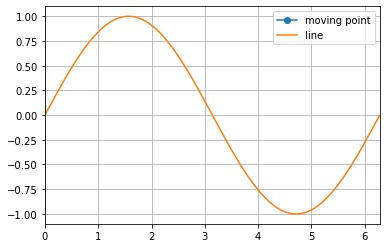

In [18]:
fig2, ax2 = plt.subplots()  # figとaxを準備

# 動くプロット
move_point, = ax2.plot([], [], label="moving point", marker="o")

# 動かさないものをプロット
ax2.plot(x, y, label="line")
ax2.set_xlim(0, 2*np.pi)
ax2.set_ylim(-1.1, 1.1)
ax2.grid()
ax2.legend()

アップデート関数

In [19]:
def update2(i):
    move_point.set_data(x[i], y[i])  # プロットの位置を変更

あとは同じ．こちらのほうが高速．

In [20]:
ani2 = anm.FuncAnimation(
    fig = fig2,
    func = update2,
    frames = range(0, len(x), 10),
    interval=50
)
ani2.save('ani2.gif', writer='pillow')
HTML(ani2.to_jshtml())  # jupyter以外では不要

# githubではアニメは表示されない

![pic](animation/ani2.gif)

****
## ArtistAnimation
流れ  
1. フレームを事前に全て作成  
2. 全フレームをArtistAnimationにわたす  

使い方の説明はカット